In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
with open('mapped100mems.json', 'r') as f:
    data = '[' + ", ".join(f.read().split()) + ']'

In [3]:
#mems = json.loads(data)

In [4]:
mems_df = pd.read_json(data, orient='index')

In [5]:
mems_df = mems_df.T

In [6]:
annon = mems_df['annotation'].values

In [96]:
annon

array([{'mems': '[["TACCCCCTTTTACCCATGCTCTTTCTCCTTCAAACAAAGGTGACTCAAATGTTTGGAGACAGAGT",["2618721:31"]],["GAATAAAACCCATTGGAAGGAAGGGAAGATATCT",["2618731:18"]]]'},
       {'mems': '[["ACAAAAAATACAAAAATTAGTTGGGTATG",["1015186:20"]],["AAAAAATACAAAAATTAGTTGGGTATG",["3721892:-9"]],["TGGGTATGATGGCACATGCCTGTAGTCCCAGCAGCTTGGGAGGCCAAGGTGGGAGGATCACTTGAGCCCAGGAGTTCAA",["3309987:-24"]],["TTGGGAGGCCAAGGTGGGAGGATCACTTGAGCCCAGGA",["4183982:27"]],["TTGGGAGGCCAAGGTGGGAGGATCACTTGAGCCCAGGAGTTCAA",["2274106:-3","2401664:-0","3309983:-2","3792273:-22","4019588:22"]],["GGGAGGCCAAGGTGGGAGGATCACTTGAGCCCAGGAGTT",["2401662:-1","3932433:9"]]]'},
       {'mems': '[["CTAAAATTCTAAGAGAAAATGTAAAAAGAAAAAAAATTACAACTCCCATTCAAAAGATGAAAAATAACAGCCTACCACT",["2304318:7"]],["ATTGACATTTTCCTATATGC",["2304323:12"]]]'},
       ...,
       {'mems': '[["TAGGCAACAAGAGAGAAACTCTGTCTCAAATAAATTAATTGATTA",["1549517:5"]],["GGCAACAAGAGAGAAACTCTGTCTCAAA",["1570995:-22","4011425:26"]],["TTAATTGTATTAATAATTATTAAC",["1549521:16"]],["TTAATAATTATTA

In [38]:
sequence_count_and_freq(annon[0]['mems'])


(2, array([1, 1]))

In [97]:
def sequence_count_and_freq(mem):
    freq = list()
    seq_len = list()
    mems_json = json.loads(mem) 
    for i in mems_json:
        freq.append(len(i[1]))
        seq_len.append(len(i[0]))
    return len(mems_json), np.array(freq), np.array(seq_len)

In [98]:
mems_stats = [ sequence_count_and_freq(a['mems']) for a in annon ]

In [99]:
mems_stats

[(2, array([1, 1]), array([65, 34])),
 (6, array([1, 1, 1, 1, 5, 2]), array([29, 27, 79, 38, 44, 39])),
 (2, array([1, 1]), array([79, 20])),
 (1, array([1]), array([91])),
 (10,
  array([1, 1, 1, 1, 1, 1, 0, 1, 2, 1]),
  array([22, 24, 21, 32, 52, 31, 30, 31, 39, 36])),
 (1, array([1]), array([99])),
 (1, array([1]), array([96])),
 (1, array([1]), array([80])),
 (2, array([1, 1]), array([77, 22])),
 (1, array([1]), array([75])),
 (1, array([1]), array([89])),
 (2, array([1, 1]), array([59, 22])),
 (2, array([1, 1]), array([57, 42])),
 (2, array([1, 1]), array([38, 33])),
 (1, array([1]), array([95])),
 (1, array([1]), array([100])),
 (1, array([1]), array([95])),
 (1, array([1]), array([100])),
 (5, array([3, 1, 3, 7, 1]), array([20, 80, 37, 26, 28])),
 (1, array([1]), array([100])),
 (1, array([1]), array([100])),
 (1, array([1]), array([86])),
 (1, array([1]), array([82])),
 (2, array([1, 1]), array([47, 52])),
 (1, array([1]), array([100])),
 (1, array([1]), array([90])),
 (2, arra

In [100]:
counts = list()
positions_counts = np.array([])
mems_length = np.array([])
for i in mems_stats:
    counts.append(i[0])
    positions_counts = np.append(positions_counts, i[1])
    mems_length = np.append(mems_length, i[2])

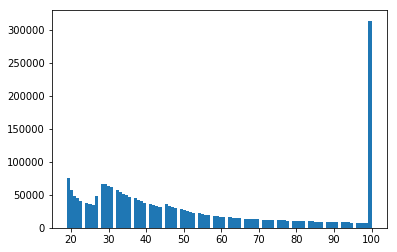

In [103]:
plt.hist(mems_length, bins=100);

In [84]:
counts = np.array(counts)

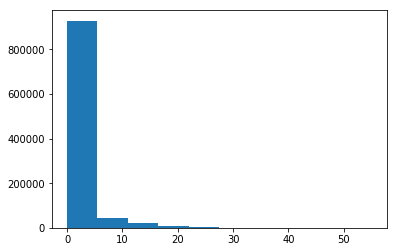

In [79]:
plt.hist(counts);

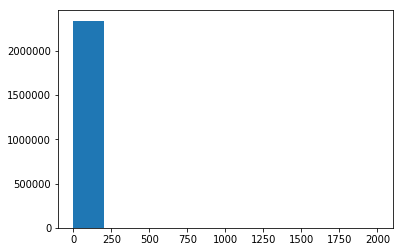

In [80]:
high_positions_counts = positions_counts[positions_counts > 0]
plt.hist(high_positions_counts);

In [86]:
long_counts = counts[counts > 0]

(array([4.62471e+05, 3.32036e+05, 8.94010e+04, 2.83000e+04, 3.84010e+04,
        2.44330e+04, 1.48740e+04, 8.26600e+03, 1.72200e+03, 6.80000e+01]),
 array([0.        , 0.40073332, 0.80146664, 1.20219996, 1.60293327,
        2.00366659, 2.40439991, 2.80513323, 3.20586655, 3.60659987,
        4.00733319]),
 <a list of 10 Patch objects>)

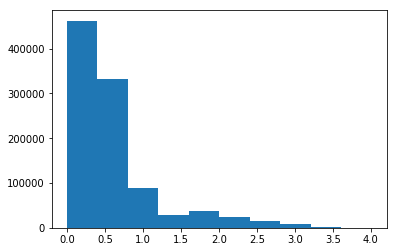

In [87]:
plt.hist(np.log(long_counts))

In [88]:
def h(x):
    filter_counts = counts[counts > x]
    plt.hist(filter_counts)
    plt.show()

interact(h, x=(1, 30, 1))

interactive(children=(IntSlider(value=15, description='x', max=30, min=1), Output()), _dom_classes=('widget-in…

<function __main__.h(x)>

In [92]:
mems_df

,annotation,identity,mapping_quality,name,path,refpos,score,secondary_score,sequence,time_used,seq_len
0,"{'mems': '[[""TACCCCCTTTTACCCATGCTCTTTCTCCTTCAA...",0.99,60,0be4778ad366b541,{'mapping': [{'position': {'node_id': '2618721...,"[{'offset': '33564283', 'name': '21'}]",105,NaN,TACCCCCTTTTACCCATGCTCTTTCTCCTTCAAACAAAGGTGACTC...,1115,<bound method _noarg_wrapper.<locals>.wrapper ...
1,"{'mems': '[[""ACAAAAAATACAAAAATTAGTTGGGTATG"",[""...",0.99,60,7638be6dd4f431e9,{'mapping': [{'position': {'node_id': '3309987...,"[{'offset': '40153314', 'is_reverse': True, 'n...",105,"[51, 49, 49, 49, 46, 39, 0]",ACAAAAAATACAAAAATTAGTTGGGTATGATGGCACATGCCTGTAG...,6020,<bound method _noarg_wrapper.<locals>.wrapper ...
2,"{'mems': '[[""CTAAAATTCTAAGAGAAAATGTAAAAAGAAAAA...",0.99,60,aaeea62daae4a15c,{'mapping': [{'position': {'node_id': '2304318...,"[{'offset': '30612819', 'name': '21'}]",105,NaN,CTAAAATTCTAAGAGAAAATGTAAAAAGAAAAAAAATTACAACTCC...,919,<bound method _noarg_wrapper.<locals>.wrapper ...
3,"{'mems': '[[""GAAAAGGTGCTCAATGTCATGGATCATCAGATA...",0.99,60,10d9f32edb5b3d49,{'mapping': [{'position': {'node_id': '1441183...,"[{'offset': '22721640', 'name': '21'}]",105,NaN,GAAAAGGTGCTCAATGTCATGGATCATCAGATAAATGCAAATGAAA...,610,<bound method _noarg_wrapper.<locals>.wrapper ...
4,"{'mems': '[[""ACCTCCTACCAGGTTCCTCCTA"",[""984378:...",0.98,60,1e85a9c9c73fbd1a,{'mapping': [{'position': {'node_id': '1252918...,"[{'offset': '21078904', 'is_reverse': True, 'n...",100,"[42, 41, 38, 0]",GATTCAATGACCTCCTACCAGGTTCCTCCTACAACACATAGCAATT...,2745,<bound method _noarg_wrapper.<locals>.wrapper ...
5,"{'mems': '[[""AAGAAGTTTGTCAGAATTCTTCTATCTAGTTTT...",0.99,60,fd365bfe1b0ac65e,{'mapping': [{'position': {'node_id': '376303'...,"[{'offset': '10732615', 'name': '21'}]",105,NaN,AAGAAGTTTGTCAGAATTCTTCTATCTAGTTTTGATTTGAAGATAT...,867,<bound method _noarg_wrapper.<locals>.wrapper ...
6,"{'mems': '[[""ATTGGTGGGCATTTGGGTTGGTTCCAAGTCTTT...",0.99,60,786b040f121b8701,{'mapping': [{'position': {'node_id': '312577'...,"[{'offset': '9693807', 'is_reverse': True, 'na...",105,NaN,ATTGGTGGGCATTTGGGTTGGTTCCAAGTCTTTGGTTTTGTGAAAA...,522,<bound method _noarg_wrapper.<locals>.wrapper ...
7,"{'mems': '[[""GTGGACTCCAAGCCAAAGTAGGACACCAAAACC...",0.98,60,e77ce18cfc353b42,{'mapping': [{'position': {'node_id': '2829239...,"[{'offset': '35618377', 'is_reverse': True, 'n...",100,NaN,TATGGTGAATTCTTCATAGTGGACTCCAAGCCAAAGTAGGACACCA...,871,<bound method _noarg_wrapper.<locals>.wrapper ...
8,"{'mems': '[[""CTTCAAGGTCTTGATCAATAATGTGGTTTAAAT...",0.99,60,f116bcbbae26a737,{'mapping': [{'position': {'node_id': '1181013...,"[{'offset': '20425568', 'name': '21'}]",105,NaN,CTTCAAGGTCTTGATCAATAATGTGGTTTAAATTATTGCACCTCAC...,1114,<bound method _noarg_wrapper.<locals>.wrapper ...
9,"{'mems': '[[""ATACATCTTACTACACACCTAGGCTACATGGTA...",0.99,60,0c3e4bdfaa050344,{'mapping': [{'position': {'node_id': '1495195...,"[{'offset': '23195851', 'is_reverse': True, 'n...",105,NaN,GAGTGTACCAACACAAAACCATATCATACATCTTACTACACACCTA...,929,<bound method _noarg_wrapper.<locals>.wrapper ...
